In [1]:
%matplotlib inline

import os
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import numpy as np
import rasterio as rio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import rasterstats
from googletrans import Translator

In [2]:
#load the agricultural land plots
shapefile_path = "Data_files/AgriculturalPlots.shp"
gdf = gpd.read_file(shapefile_path)
gdf.head()

,LIVELLO_1,LIVELLO_2,LIVELLO_3,LIVELLO_4,CODICE,DESC_,r_values,Shape_Leng,Shape_Area,geometry
0,2,22,221,221,221,vigneti,0,501.375367,15425.720528,"POLYGON Z ((624928.936 4524456.737 0.000, 6249..."
1,2,22,221,221,221,vigneti,0,345.547175,3950.418187,"POLYGON Z ((626418.083 4525563.352 0.000, 6264..."
2,2,22,222,222,222,frutteti e frutti minori,0,446.534899,8438.083857,"POLYGON Z ((630769.584 4528312.297 0.000, 6307..."
3,2,22,222,222,222,frutteti e frutti minori,0,41.937379,94.822193,"POLYGON Z ((632430.634 4523891.763 0.000, 6324..."
4,2,22,222,222,222,frutteti e frutti minori,0,486.227675,6614.721207,"POLYGON Z ((628757.751 4524266.747 0.000, 6287..."


In [3]:
rows, cols = gdf.shape
print('Number of features: {}'.format(rows))

Number of features: 558


In [33]:
gdf.columns

Index(['LIVELLO_1', 'LIVELLO_2', 'LIVELLO_3', 'LIVELLO_4', 'CODICE', 'DESC_',
       'r_values', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [34]:
# Identify columns to delete
columns_to_delete = ['LIVELLO_1', 'LIVELLO_2', 'LIVELLO_3', 'LIVELLO_4', 'r_values', 'Shape_Leng', 'Shape_Area']

# Drop the specified columns
gdf.drop(columns=columns_to_delete, inplace=True)

# Save the modified GeoDataFrame back to a shapefile
output_path = 'Data_files/updated_shapefile.shp'
gdf.to_file(output_path)

print(f"Columns {', '.join(columns_to_delete)} have been deleted from the shapefile.")

Columns LIVELLO_1, LIVELLO_2, LIVELLO_3, LIVELLO_4, r_values, Shape_Leng, Shape_Area have been deleted from the shapefile.


In [39]:
gdf = gpd.read_file(output_path)
gdf.columns

Index(['CODICE', 'DESC_', 'geometry'], dtype='object')

In [35]:
gdf['DESC_']

0                                      vineyards
1                                      vineyards
2                      orchards and minor fruits
3                      orchards and minor fruits
4                      orchards and minor fruits
                         ...                    
553    simple arable land in non-irrigated areas
554                                 olive groves
555    simple arable land in non-irrigated areas
556    simple arable land in non-irrigated areas
557    simple arable land in non-irrigated areas
Name: DESC_, Length: 558, dtype: object

In [5]:
from  deep_translator import GoogleTranslator

# Initialize the translator
translator = GoogleTranslator(source='it', target='en')

# Translate the 'DESC_' column from Italian to English
def translate_column(value):
    # Check if the value is None or empty string
    if value is None or value == '':
        return ''
    try:
        # Attempt to translate the value
        translated_value = translator.translate(value)
        return translated_value
    except Exception as e:
        # If an error occurs, print the error and return the original value
        print(f"Error translating '{value}': {e}")
        return value

# Apply translation to the 'DESC_' column
gdf['DESC_'] = gdf['DESC_'].apply(translate_column)

# Save the GeoDataFrame with the translated column
gdf.to_file('Data_files/translated_shapefile.shp')

# Print a success message
print("The 'DESC_' column has been translated from Italian to English and saved in 'translated_shapefile.shp'.")

Error translating 'seminativi semplici in aree non irrigue': ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
The 'DESC_' column has been translated from Italian to English and saved in 'translated_shapefile.shp'.


In [36]:
#load the agricultural land plots
shapefile_path = "Data_files/translated_shapefile.shp"
gdf = gpd.read_file(shapefile_path)
gdf.head()

,LIVELLO_1,LIVELLO_2,LIVELLO_3,LIVELLO_4,CODICE,DESC_,r_values,Shape_Leng,Shape_Area,geometry
0,2,22,221,221,221,vineyards,0,501.375367,15425.720528,"POLYGON Z ((624928.936 4524456.737 0.000, 6249..."
1,2,22,221,221,221,vineyards,0,345.547175,3950.418187,"POLYGON Z ((626418.083 4525563.352 0.000, 6264..."
2,2,22,222,222,222,orchards and minor fruits,0,446.534899,8438.083857,"POLYGON Z ((630769.584 4528312.297 0.000, 6307..."
3,2,22,222,222,222,orchards and minor fruits,0,41.937379,94.822193,"POLYGON Z ((632430.634 4523891.763 0.000, 6324..."
4,2,22,222,222,222,orchards and minor fruits,0,486.227675,6614.721207,"POLYGON Z ((628757.751 4524266.747 0.000, 6287..."


In [7]:
rows, cols = gdf.shape
print('Number of features: {}'.format(rows))

Number of features: 558


In [8]:
#Check the validity of each geometry
validity_check = gdf['geometry'].is_valid

# Add the validity check results to your GeoDataFrame as a new column
gdf['is_valid'] = validity_check

# Now you can inspect the 'is_valid' column to see which geometries are valid
print(gdf[['geometry', 'is_valid']])

                                              geometry  is_valid
0    POLYGON Z ((624928.936 4524456.737 0.000, 6249...      True
1    POLYGON Z ((626418.083 4525563.352 0.000, 6264...      True
2    POLYGON Z ((630769.584 4528312.297 0.000, 6307...      True
3    POLYGON Z ((632430.634 4523891.763 0.000, 6324...      True
4    POLYGON Z ((628757.751 4524266.747 0.000, 6287...      True
..                                                 ...       ...
553  POLYGON Z ((624043.542 4525323.204 0.000, 6240...      True
554  POLYGON Z ((624029.037 4524565.286 0.000, 6240...      True
555  POLYGON Z ((622529.314 4532364.487 0.000, 6225...      True
556  POLYGON Z ((624061.859 4525081.633 0.000, 6241...      True
557  POLYGON Z ((636125.390 4524275.178 0.000, 6361...      True

[558 rows x 2 columns]


In [9]:
# Check for any invalid geometries
invalid = gdf[~gdf['geometry'].is_valid]

# Report if any invalid geometries are found
if not invalid.empty:
    print(f"Found {len(invalid)} invalid geometries.")
else:
    print("No invalid geometries found.")

Found 4 invalid geometries.


In [10]:
# Filter for invalid geometries
invalid_geometries = gdf[~gdf['is_valid']]

# Now you have a GeoDataFrame 'invalid_geometries' containing only the invalid geometries
print(invalid_geometries)

     LIVELLO_1  LIVELLO_2  LIVELLO_3  LIVELLO_4  CODICE  \
231          2         21        211       2111    2111   
296          2         21        211       2111    2111   
388          2         21        211       2111    2111   
472          2         21        211       2111    2111   

                                         DESC_  r_values     Shape_Leng  \
231  simple arable land in non-irrigated areas         0   14331.903742   
296  simple arable land in non-irrigated areas         0   63892.424044   
388  simple arable land in non-irrigated areas         0  105829.497642   
472  simple arable land in non-irrigated areas         0    7755.741280   

       Shape_Area                                           geometry  is_valid  
231  1.362593e+06  POLYGON Z ((622743.788 4525053.291 0.000, 6227...     False  
296  5.123648e+06  POLYGON Z ((632805.086 4528997.787 0.000, 6328...     False  
388  1.167102e+07  POLYGON Z ((631084.993 4530809.574 0.000, 6310...     False  
472 

<Axes: >

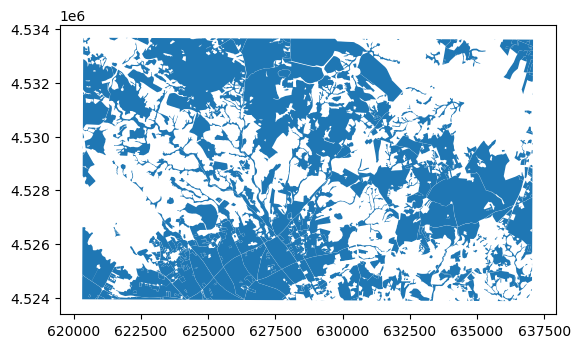

In [11]:
clean = gdf.geometry.buffer(0)

clean.plot()

In [12]:
# Get the CRS of the shapefile
crs = gdf.crs

# Check if the CRS is a UTM projection and is projected
if crs and crs.is_projected:
    print(f"CRS {crs} is suitable for calculating areas.")
else:
    print(f"CRS {crs} needs conversion to a Projected Coordinate System (PCS) for accurate area calculations.")

CRS EPSG:32633 is suitable for calculating areas.


In [43]:
gdf["surfarea_ha"] = gdf['geometry'].area/10**4

gdf.head(2)

,CODICE,DESC_,geometry,area_ha,surfarea_ha
0,221,vineyards,"POLYGON Z ((624928.936 4524456.737 0.000, 6249...",1.542572,1.542572
1,221,vineyards,"POLYGON Z ((626418.083 4525563.352 0.000, 6264...",0.395042,0.395042


<Axes: >

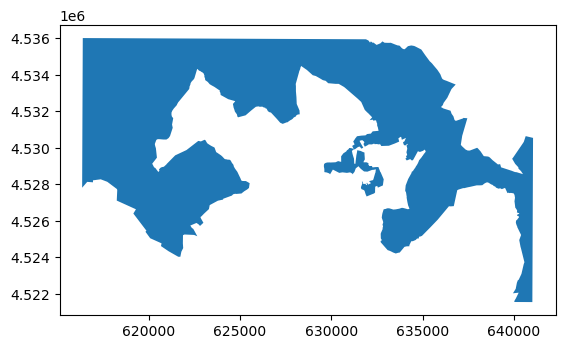

In [18]:
# Load the Protected Areas (PAs) shapefile into a GeoDataFrame
PAs_gdf = gpd.read_file('Data_files/PAs.shp') 

# Load the Area of Interest (AOI) shapefile into a GeoDataFrame
AOI_gdf = gpd.read_file('Data_files/Area_of_interest.shp')

# Clip the PAs by the AOI
clipped_PAs = gpd.clip(PAs_gdf, AOI_gdf)

# Save the clipped GeoDataFrame to a new shapefile
clipped_PAs.to_file('Data_files/clipped_PAs.shp')

clipped_PAs.plot()

In [45]:
clipped_PAs.head()

,R_LEGISL,CORRECTIONS,NAME,CLASSIF,CODEAP,decree,Publ,Area_ha,management,MOD_INTEGR,NORM,COMMON_NAME,CLASS,geometry
0,L. n. 426 del 09.12.1998,None,Parco nazionale dell'Alta Murgia,Parco Nazionale,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,Ente Parco Nazionale dell' Alta Murgia,aaaaa,None,None,Parchi nazionali e riserve naturali statali,"POLYGON ((620519.703 4528668.802, 620574.459 4..."


In [46]:
# Identify columns to delete
columns_to_delete = ['CORRECTIONS', 'MOD_INTEGR', 'NORM', 'COMMON_NAME']

# Drop the specified columns
clipped_PAs.drop(columns=columns_to_delete, inplace=True)

# Save the modified GeoDataFrame back to a shapefile
output_path = 'Data_files/updated_PAs.shp'
clipped_PAs.to_file(output_path)

print(f"Columns {', '.join(columns_to_delete)} have been deleted from the shapefile.")

Columns CORRECTIONS, MOD_INTEGR, NORM, COMMON_NAME have been deleted from the shapefile.


In [49]:
clipped_PAs = gpd.read_file(output_path)
clipped_PAs.columns

Index(['R_LEGISL', 'NAME', 'CLASSIF', 'CODEAP', 'decree', 'Publ', 'Area_ha',
       'management', 'CLASS', 'geometry'],
      dtype='object')

In [20]:
# Initialize the translator
translator = GoogleTranslator(source='it', target='en')

# Translate the column titles
translated_columns = {col: translator.translate(col) for col in clipped_PAs.columns}

# Rename the columns with the translated titles
clipped_PAs.rename(columns=translated_columns, inplace=True)

# Save the GeoDataFrame with the translated column titles to a new shapefile
clipped_PAs.to_file('Data_files/translated_PAs.shp')

# Print a success message
print("The column titles of the clipped_PAs shapefile have been successfully translated from Italian to English and saved as 'translated_PAs.shp'.")

The column titles of the clipped_PAs shapefile have been successfully translated from Italian to English and saved as 'translated_PAs.shp'.


C:\Users\M533\AppData\Local\Temp\ipykernel_13180\3435555182.py:11: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clipped_PAs.to_file('Data_files/translated_PAs.shp')


In [21]:
clipped_PAs.columns

Index(['R_LEGISL', 'CORRECTIONS', 'NAME', 'CLASSIF', 'CODEAP', 'decree',
       'Publ', 'Area_ha', 'management', 'MOD_INTEGR', 'NORM', 'COMMON_NAME',
       'CLASS', 'geometry'],
      dtype='object')

<Axes: >

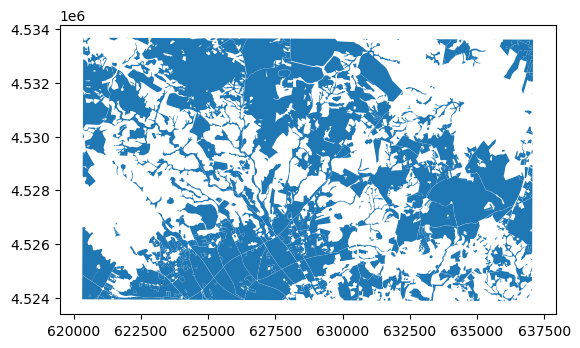

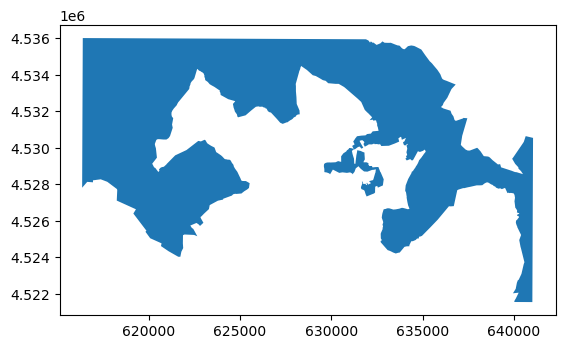

In [22]:
gdf.plot()
clipped_PAs.plot()

In [23]:
#we want to check the two GeoDataFrame objects have the same CRS
print(gdf.crs == clipped_PAs.crs)

True


In [51]:
# Perform the spatial join
join = gpd.sjoin(gdf, clipped_PAs, how='left', predicate='intersects')

# Calculate the area of intersection for each row
join['intersection_ha'] = join['geometry'].area /10**4

# Save the resulting shapefile with the new column
join.to_file('Data_files/joined_with_area.shp')

# Print a success message
print("The joined shapefile now includes a column with the area of intersection")

The joined shapefile now includes a column with the area of intersection


C:\Users\M533\AppData\Local\Temp\ipykernel_13180\1118944723.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  join.to_file('Data_files/joined_with_area.shp')


In [52]:
join

,CODICE,DESC_,geometry,area_ha,surfarea_ha,index_right,R_LEGISL,NAME,CLASSIF,CODEAP,decree,Publ,Area_ha,management,CLASS,intersection_ha
0,221,vineyards,"POLYGON Z ((624928.936 4524456.737 0.000, 6249...",1.542572,1.542572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.542572
1,221,vineyards,"POLYGON Z ((626418.083 4525563.352 0.000, 6264...",0.395042,0.395042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.395042
2,222,orchards and minor fruits,"POLYGON Z ((630769.584 4528312.297 0.000, 6307...",0.843808,0.843808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.843808
3,222,orchards and minor fruits,"POLYGON Z ((632430.634 4523891.763 0.000, 6324...",0.009482,0.009482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009482
4,222,orchards and minor fruits,"POLYGON Z ((628757.751 4524266.747 0.000, 6287...",0.661472,0.661472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2111,simple arable land in non-irrigated areas,"POLYGON Z ((624043.542 4525323.204 0.000, 6240...",1.060328,1.060328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.060328
554,223,olive groves,"POLYGON Z ((624029.037 4524565.286 0.000, 6240...",3.043422,3.043422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.043422
555,2111,simple arable land in non-irrigated areas,"POLYGON Z ((622529.314 4532364.487 0.000, 6225...",300.686806,300.686806,0.0,L. n. 426 del 09.12.1998,Parco nazionale dell'Alta Murgia,Parco Nazionale,EUAP0852,DPR 10.03.2004,GU n. 152 del 1.07.2004,68032.666725,Ente Parco Nazionale dell' Alta Murgia,Parchi nazionali e riserve naturali statali,300.686806
556,2111,simple arable land in non-irrigated areas,"POLYGON Z ((624061.859 4525081.633 0.000, 6241...",78.089604,78.089604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.089604


In [ ]:
# Rename columns to ensure they are no longer than 10 characters
shortened_columns = {col: col[:10] for col in join.columns if len(col) > 10}
join.rename(columns=shortened_columns, inplace=True)

# Check for any non-unique column names
if len(join.columns) != len(set(join.columns)):
    raise ValueError("Non-unique column names detected after truncation.")

# Save the joined shapefile with the new column names
join.to_file('Data_files/joined_with_area.shp')

# Print a success message
print("The joined shapefile has been saved with shortened column names to avoid truncation.")

In [58]:
join.groupby(['CODEAP'])['intersection_ha'].sum()

CODEAP
EUAP0852    5973.351844
Name: intersection_ha, dtype: float64